# Exploring and Visualising Amazon Sales Data

In [1]:
#import necessary start-up libs
import pandas as pd
import numpy as np 
import matplotlib as plt 
import seaborn as sns 

## Part 1: Exploratory Analysis on Total Folder 

I noticed that the folder was quite large in size so wanted to write some code to explore what's underneath. 

In [2]:
from os import listdir
from os.path import isfile, join

files_name = [f for f in listdir('./DataFiles/') if isfile(join('./DataFiles/', f))]
print("Total File Count: "+str(len(files_name)))
files_name

Total File Count: 140


['Air Conditioners.csv',
 'All Appliances.csv',
 'All Books.csv',
 'All Car and Motorbike Products.csv',
 'All Electronics.csv',
 'All English.csv',
 'All Exercise and Fitness.csv',
 'All Grocery and Gourmet Foods.csv',
 'All Hindi.csv',
 'All Home and Kitchen.csv',
 'All Movies and TV Shows.csv',
 'All Music.csv',
 'All Pet Supplies.csv',
 'All Sports Fitness and Outdoors.csv',
 'All Video Games.csv',
 'Amazon Fashion.csv',
 'Amazon Pharmacy.csv',
 'Amazon-Products.csv',
 'Baby Bath Skin and Grooming.csv',
 'Baby Fashion.csv',
 'Baby Products.csv',
 'Backpacks.csv',
 'Badminton.csv',
 'Bags and Luggage.csv',
 'Ballerinas.csv',
 'Beauty and Grooming.csv',
 'Bedroom Linen.csv',
 'Blu-ray.csv',
 'Camera Accessories.csv',
 'Cameras.csv',
 'Camping and Hiking.csv',
 'Car Accessories.csv',
 'Car and Bike Care.csv',
 'Car Electronics.csv',
 'Car Parts.csv',
 'Cardio Equipment.csv',
 'Casual Shoes.csv',
 'Childrens Books.csv',
 'Clothing.csv',
 'Coffee Tea and Beverages.csv',
 'Cricket.csv',


Another observation I stumbled across was that a lot of these data entries contain the word "Fashion" - perhaps this is a good overall catogory to explore collectively. 

*Further improvement*: could be to find a lot to tag all entries with a broader category as not all fashion items are in fashion_list (for example). 

In [3]:
fashion_data = [] 
#create empty fashion data list 

for f in files_name: 
    if "Fashion" in f:
        fashion_data.append(f) 

fashion_data
        

['Amazon Fashion.csv',
 'Baby Fashion.csv',
 'Fashion and Silver Jewellery.csv',
 'Fashion Sales and Deals.csv',
 'Fashion Sandals.csv',
 'Kids Fashion.csv',
 'Mens Fashion.csv',
 'Womens Fashion.csv']

## Part 2: Examining Fashion Data

For the sake of simplicity, we can begin with the Amazon Fashion dataset. Here, I import the CSV data into pandas and did a quick check of all columns characteristics (names and data types)

In [4]:
amzn_fashion = pd.read_csv('./DataFiles/Amazon Fashion.csv') 
column_names= amzn_fashion.columns.to_list() 

print(column_names) #9 entries 
print(amzn_fashion.dtypes) #all object -> need to convert (especially for ratings, no_of_ratings, discount price, actual_price)

amzn_fashion.head(5)

['name', 'main_category', 'sub_category', 'image', 'link', 'ratings', 'no_of_ratings', 'discount_price', 'actual_price']
name              object
main_category     object
sub_category      object
image             object
link              object
ratings           object
no_of_ratings     object
discount_price    object
actual_price      object
dtype: object


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Aqualogica Glow+ Dewy Sunscreen SPF 50 PA+++ F...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/51TSC6Uogx...,https://www.amazon.in/Aqualogica-Sunscreen-Pro...,4.2,"3,628",₹351,₹399
1,MARVIK Soft Silicone Adjustable Band Strap Com...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/51vYDop04S...,https://www.amazon.in/MARVIK-Silicone-Adjustab...,3.9,291,₹249,₹999
2,108 Panchatantra Stories for Children (Illustr...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/81VJ+MAc7Y...,https://www.amazon.in/108-Panchatantra-Stories...,4.4,"2,950",₹125,₹160
3,Black and White and Blue: Adult Cinema From th...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/51RIhaW3t1...,https://www.amazon.in/Black-White-Blue-Cinema-...,4.2,8,NaN,₹584.16
4,SAFARI 15 Ltrs Sea Blue Casual/School/College ...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/61kmCas5OC...,https://www.amazon.in/SAFARI-Ltrs-Casual-Backp...,4.0,"17,985",₹299,₹799


### Part 3: Really Scrubing Down the Data

I noticed that the columns 'main category' and 'sub_category' could use a clean up as they essentially contain the same value. This checks for uniqueness per column and remove them based on this.

In [5]:
# dataframe could probably benefit from some removal (e.g. if all main_cat are stores then could be removed; imges and link currently have no immediate use?))
#dropping repetitive column
for c in column_names: 
    if len(set(amzn_fashion[c].values)) == 1:
        print(str(amzn_fashion[c]))
        amzn_fashion = amzn_fashion.drop(str(c), axis=1) 
        column_names.remove(c)
    else: 
        pass 

amzn_fashion=amzn_fashion.dropna().reset_index(drop=True) # we drop na data to make it easier to work with (2352 to 1989 rows) 


0       stores
1       stores
2       stores
3       stores
4       stores
         ...  
2347    stores
2348    stores
2349    stores
2350    stores
2351    stores
Name: main_category, Length: 2352, dtype: object


The data gets messy in that all columns are essentially object. This will make data processing especially HARD with numerical data that we need to process. 

Ratings were pretty straight forward. As most values were below 100 within the range of 0 to 5, convert them to float was relatively doable in one line. 

No of Ratings, on the other hands, needed to be scrubbed down to account for values above 1,000 which would contain a comma string. 
I stripped this down to replace with "", then convert them into a float as above.

In [6]:
amzn_fashion['ratings'] = pd.to_numeric(amzn_fashion['ratings'], errors='coerce') # drop 4 rows from ratings that was not a number 


for i, r in enumerate(amzn_fashion):
    try:
        amzn_fashion['no_of_ratings'][i] = float(amzn_fashion['no_of_ratings'][i].replace(",",""))
    except ValueError: 
        pass 

amzn_fashion['no_of_ratings'] = pd.to_numeric(amzn_fashion['no_of_ratings'], errors='coerce')

print(amzn_fashion['ratings'].notna().sum())
#print(float(amzn_fashion['no_of_ratings'][0].replace(",","")))

1985


C:\Users\phuon\AppData\Local\Temp\ipykernel_107200\1471256321.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_fashion['no_of_ratings'][i] = float(amzn_fashion['no_of_ratings'][i].replace(",",""))
C:\Users\phuon\AppData\Local\Temp\ipykernel_107200\1471256321.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_fashion['no_of_ratings'][i] = float(amzn_fashion['no_of_ratings'][i].replace(",",""))
C:\Users\phuon\AppData\Local\Temp\ipykernel_107200\1471256321.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

Quick Checkpoint

In [7]:
print(amzn_fashion.head())
print(amzn_fashion['ratings'].dtype)
print(amzn_fashion['no_of_ratings'].dtype)
print(amzn_fashion['actual_price'].dtype)
print(amzn_fashion['discount_price'].dtype)

                                                name    sub_category   
0  Aqualogica Glow+ Dewy Sunscreen SPF 50 PA+++ F...  Amazon Fashion  \
1  MARVIK Soft Silicone Adjustable Band Strap Com...  Amazon Fashion   
2  108 Panchatantra Stories for Children (Illustr...  Amazon Fashion   
3  SAFARI 15 Ltrs Sea Blue Casual/School/College ...  Amazon Fashion   
4  The Derma Co 1% Hyaluronic Sunscreen Aqua Ultr...  Amazon Fashion   

                                               image   
0  https://m.media-amazon.com/images/I/51TSC6Uogx...  \
1  https://m.media-amazon.com/images/I/51vYDop04S...   
2  https://m.media-amazon.com/images/I/81VJ+MAc7Y...   
3  https://m.media-amazon.com/images/I/61kmCas5OC...   
4  https://m.media-amazon.com/images/I/51x3cj+-iU...   

                                                link  ratings  no_of_ratings   
0  https://www.amazon.in/Aqualogica-Sunscreen-Pro...      4.2         3628.0  \
1  https://www.amazon.in/MARVIK-Silicone-Adjustab...      3.9         

Converting the prices were mind-boggling at first as we're now accounting for MORE irregularities.
I followed the same thought process for the comma value, now to include the currency infront. 

In [8]:
amzn_fashion['discount_price']= [float(amzn_fashion['discount_price'][i].replace("₹","").replace(",","")) for i, r in enumerate(amzn_fashion['discount_price'])]

amzn_fashion['discount_price'] = pd.to_numeric(amzn_fashion['discount_price'], errors='coerce')
#print(amzn_fashion['discount_price'].notnull().sum())
#print(amzn_fashion['discount_price'])


amzn_fashion['actual_price']= [float(amzn_fashion['actual_price'][i].replace("₹","").replace(",","")) for i, r in enumerate(amzn_fashion['actual_price'])]

amzn_fashion['actual_price'] = pd.to_numeric(amzn_fashion['actual_price'], errors='coerce')

### Part 4: Visualising

I first calculated *Discount by %* as this could be a useful number in seeing the impact discounting has on ratings - or not? 

In [9]:
amzn_fashion['Discount by %'] = (amzn_fashion['actual_price'] / amzn_fashion['discount_price'] - 1) * 100
print(amzn_fashion['Discount by %'])

0        13.675214
1       301.204819
2        28.000000
3       167.224080
4        11.383929
           ...    
1984    101.859724
1985     34.459459
1986     98.110599
1987    420.841683
1988      4.354354
Name: Discount by %, Length: 1989, dtype: float64


Box-plotting the ratings show that average rating is 4.0. 
I removed outliars for simplicity.

Average Ratings on All Amazon Fahsion Items Is 4.0


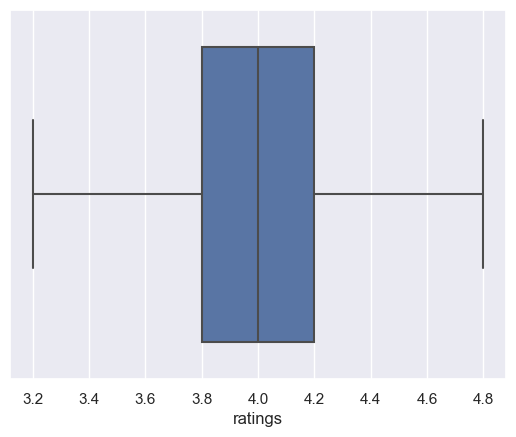

In [10]:
#Ratings 
sns.set() 
sns.boxplot(data=amzn_fashion, x='ratings',showfliers=False)

ratings_mean = round(amzn_fashion['ratings'].mean(),0)

print('Average Ratings on All Amazon Fahsion Items Is ' + str(ratings_mean))

Average No of Ratings on All Amazon Fahsion Items Is 382.57


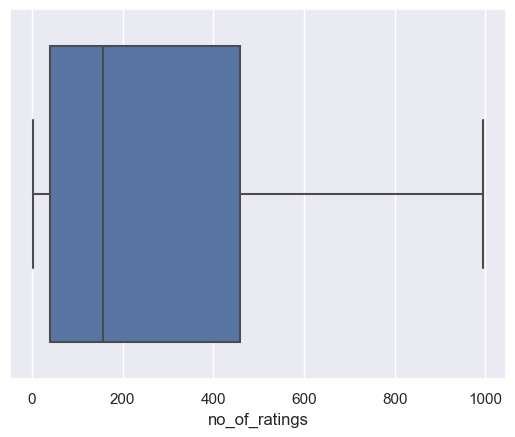

In [11]:
sns.set() 
sns.boxplot(data=amzn_fashion, x='no_of_ratings', showfliers=False) #remove outlier

no_of_ratings_mean=round(amzn_fashion['no_of_ratings'].mean(),2)

print('Average No of Ratings on All Amazon Fahsion Items Is ' + str(no_of_ratings_mean))

I wondered whether items with MORE rating will have a higher score - no correlation found.

<Axes: xlabel='no_of_ratings', ylabel='ratings'>

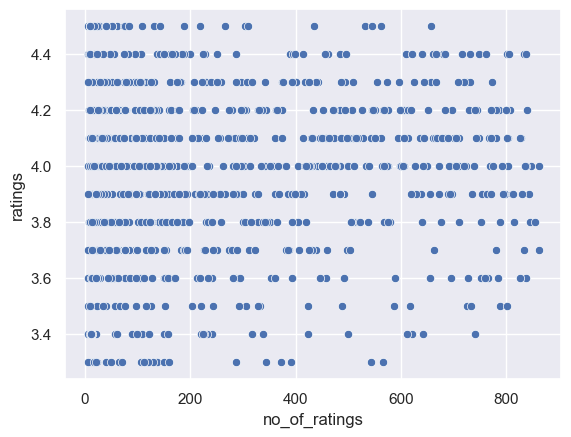

In [18]:
sns.set() 

y_range =amzn_fashion['ratings'][amzn_fashion['ratings'].between(amzn_fashion['ratings'].quantile(.05), amzn_fashion['ratings'].quantile(.95)) ]
x_range =amzn_fashion['no_of_ratings'][amzn_fashion['no_of_ratings'].between(amzn_fashion['no_of_ratings'].quantile(.05), amzn_fashion['no_of_ratings'].quantile(.95))]


sns.scatterplot(x=x_range, y=y_range)  #conclusion = no relationship

Average % Discount on All Amazon Fahsion Items Is 202.0


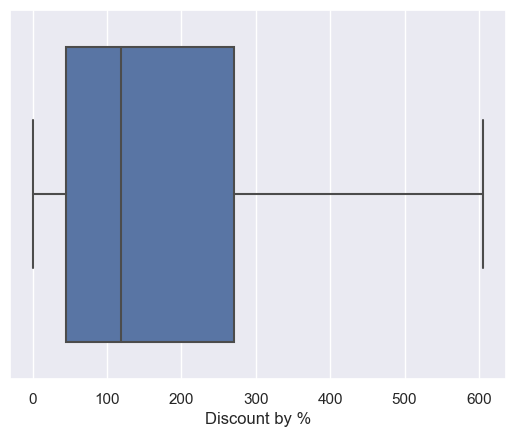

In [13]:
sns.set() 
sns.boxplot(data=amzn_fashion, x='Discount by %',showfliers=False)

discount_mean = round(amzn_fashion['Discount by %'].mean(),0)

print('Average % Discount on All Amazon Fahsion Items Is ' + str(discount_mean))

I wondered whether items with higher % discount is rewarded with higher customer satisfaction - no results.

<Axes: xlabel='Discount by %', ylabel='ratings'>

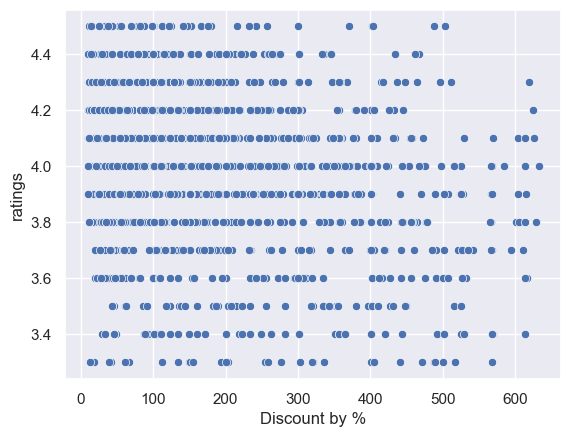

In [19]:
sns.set() 

y_range =amzn_fashion['ratings'][amzn_fashion['ratings'].between(amzn_fashion['ratings'].quantile(.05), amzn_fashion['ratings'].quantile(.95)) ]
x_range =amzn_fashion['Discount by %'][amzn_fashion['Discount by %'].between(amzn_fashion['Discount by %'].quantile(.05), amzn_fashion['Discount by %'].quantile(.95))]


sns.scatterplot(x=x_range, y=y_range) #no trend here either